In [1]:
import scipy.io
from numpy import *
import numpy as np
import matplotlib 
from matplotlib.mlab import *
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy.signal import periodogram, welch, spectrogram

% matplotlib inline

data = loadmat("eeg.mat")
hd,hdh=data['hd'],data['hdh']
rec,rech=data['rec'],data['rech'][0]



### Exercise 1 without logarithm transformation

In [2]:
fs = 100 # EEG was acquired at 100 Hz

data = rec[1,:] # EEG recording


eeg = data.reshape(len(rech)-1,3000) # The EEG matrix 
# print(data.size) prints 8490000, dividing it to 3000 gives me 2830. 
# however, print (len(rech)) is equal to 2831, that's why I subtracted 1 from len(rech)

print(eeg.shape)
print(data.size)
print(len(rech))
print(int((data.size)/3000))

row_means = np.mean(eeg, axis=1) # Mean across the second (column) axis

eeg_new = (eeg.transpose()-row_means).transpose() # I have used transpose function to subtract because the leading axes had the same dimension but not trailing axes. 

print (shape(eeg))
print (shape(eeg_new))

F, Pxx = welch(eeg_new, fs, nperseg=1024)

(2830, 3000)
8490000
2831
2830
(2830, 3000)
(2830, 3000)


## Exercise 1
This exercise should help you get a first intuition on the difference between
mean and std, median and inter-quartile range. The first are parametric
statistics, meaning they assume you have an underlying normal distribution
from which you sampled your data. The latter don’t.

#### 1. As an example, start by selecting the power of all your segments on 8hz.

indeces:
82


(array([  1.57600000e+03,   8.13000000e+02,   1.64000000e+02,
          8.60000000e+01,   3.30000000e+01,   2.40000000e+01,
          2.30000000e+01,   2.00000000e+01,   1.30000000e+01,
          8.00000000e+00,   6.00000000e+00,   8.00000000e+00,
          6.00000000e+00,   9.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

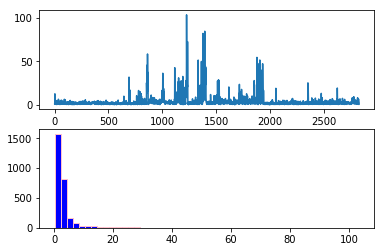

In [3]:
def indices(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]

inds = indices(F, lambda x: x > 8)[0]

print ("indeces:") 
print(inds)

p8 = Pxx[:,inds]

plt.subplot(2,1,1)
plt.plot(p8)

plt.subplot(2,1,2)
plt.hist(p8, bins=50, color="blue", edgecolor="pink")

#### 2.We are going to look only at sleep stages, so divide your data in two groups: NREM12 and NREM34, based on the hypnogram in rech.


In [9]:

sdata=rech[:-1]
sp12 = p8 [(sdata == 1) | (sdata==2)]
sp34 = p8 [(sdata == 3) | (sdata==4)]

nrem12 = np.where(np.logical_or(rech==1,rech==2))
nrem34 = np.where(np.logical_or(rech==3,rech==4))

#print (nrem12)
#print (len(sp12) , len(sp34))
#print(sp12)
size(p8)
nrem12x= [p8[x] for x in nrem12]
nrem34x= [p8[x] for x in nrem34]

In [7]:
nrem12 = np.where(np.logical_or(rech==1,rech==2))
nrem34 = np.where(np.logical_or(rech==3,rech==4))

sdata=np.repeat(rech[:-1],30*fs)
p8data = np.repeat(p8, 30*fs)

print(size(rech))
print(size(p8))

print(shape(eeg_new))

s12 = p8data[(sdata==1) | (sdata==2)]
s34 = p8data[(sdata==3) | (sdata==4)]

2831
2830
(2830, 3000)


#### 3.Now use hist to plot the two distributions (for NREM12 and NREM34) of spectral power at 8 Hz. Do they look Gaussian? Do you think they are different?
Hint: For better visualization, use the same bins for both distributions.

(array([  1.,   2.,   4.,   6.,   9.,   8.,  13.,  12.,  15.,  20.,  12.,
         12.,  16.,  16.,  10.,  15.,  11.,  18.,   9.,  14.,  10.,   7.,
          4.,   9.,   5.,   2.,   4.,   1.,   6.,   0.,   1.,   7.,   2.,
          1.,   1.,   0.,   0.,   0.,   2.,   2.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.,   2.,   1.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  0.20209637,   0.3668971 ,   0.53169783,   0.69649856,
          0.86129929,   1.02610001,   1.19090074,   1.35570147,
          1.5205022 ,   1.68530293,   1.85010366,   2.01490439,
          2.17970512,   2.34450584,   2.50930657,   2.6741073 ,
          2.83890803,   3.00370876,   3.16850949,   3.33331022,
          3.49811095,   3.66291167,   3.8277124 ,   3.99251313,
          4.15731386,   4.32211459,   4.48691532,   4.65171605,
      

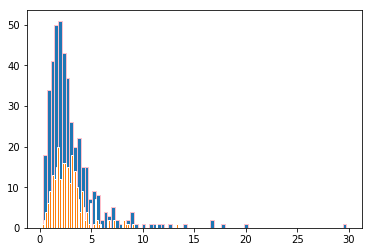

In [10]:
plt.hist(sp12, bins=80, edgecolor="pink")
plt.hist(sp34, bins=80, edgecolor="white")
